Implement the 2-approximation algorithm for the TSP.
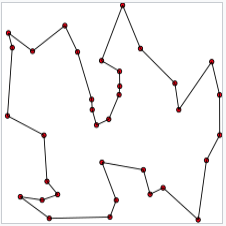

In [1]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city

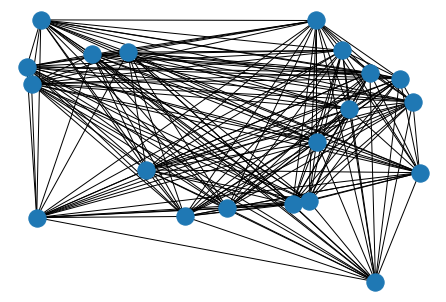

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

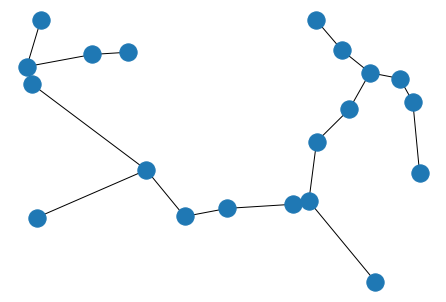

In [4]:
# find minimum spanning tree
T = nx.minimum_spanning_tree(G,weight='length')
nx.draw(T, pos=my_pos)

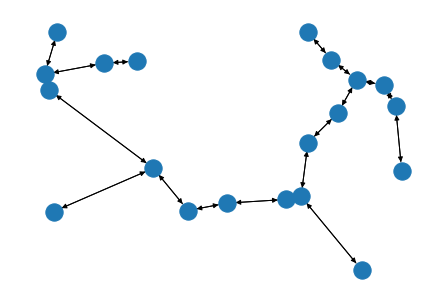

In [5]:
# double (or bi-direct) the minimum spanning tree
D = nx.DiGraph(T)
nx.draw(D, pos=my_pos)

In [6]:
# find an Eulerian cycle of the doubled spanning tree
initial_tour = list( nx.eulerian_circuit(D,source=0) )
print(initial_tour)

[(0, 19), (19, 16), (16, 8), (8, 10), (10, 9), (9, 18), (18, 1), (1, 7), (7, 15), (15, 13), (13, 17), (17, 13), (13, 15), (15, 7), (7, 3), (3, 4), (4, 3), (3, 7), (7, 1), (1, 18), (18, 9), (9, 2), (2, 9), (9, 10), (10, 8), (8, 16), (16, 19), (19, 11), (11, 14), (14, 12), (12, 5), (5, 12), (12, 14), (14, 6), (6, 14), (14, 11), (11, 19), (19, 0)]


In [7]:
# take shortcuts (avoid repeated nodes)
tour = [ 0 ]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 19, 16, 8, 10, 9, 18, 1, 7, 15, 13, 17, 3, 4, 2, 11, 14, 12, 5, 6]


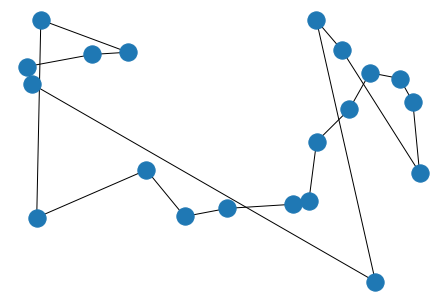

In [8]:
# draw the tour
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)